# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [1]:
import pandas as pd
%matplotlib inline

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`, *but you'll also need to install a new library*. You might need to restart your kernel afterward!

In [2]:
!pip install xlrd

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
df = pd.read_excel('richpeople.xlsx')

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [5]:
df.shape

(1653, 30)

In [6]:
df.dtypes

year                         int64
name                        object
rank                         int64
citizenship                 object
countrycode                 object
networthusbillion          float64
selfmade                    object
typeofwealth                object
gender                      object
age                        float64
industry                    object
IndustryAggregates          object
region                      object
north                        int64
politicalconnection        float64
founder                      int64
generationofinheritance     object
sector                      object
company                     object
companytype                 object
relationshiptocompany       object
foundingdate               float64
gdpcurrentus               float64
sourceofwealth              object
notes                       object
notes2                      object
source                      object
source_2                    object
source_3            

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [11]:
df.sort_values(by='networthusbillion', ascending=False).name.head(10)

184           Bill Gates
226     Carlos Slim Helu
79        Amancio Ortega
1562      Warren Buffett
862        Larry Ellison
339           David Koch
247         Charles Koch
1364     Sheldon Adelson
280       Christy Walton
724           Jim Walton
Name: name, dtype: object

## 4) How many male billionaires are there compared to the number of female billionares? What percent is that? Do they have a different average wealth?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [152]:
df.gender.value_counts()

male      1473
female     180
Name: gender, dtype: int64

In [153]:
# male percent
100 * df.gender.value_counts().male / df.name.count()

89.11070780399274

In [154]:
# female percent
100 * df.gender.value_counts().female / df.name.count()

10.88929219600726

In [155]:
df.groupby(by='gender').networthusbillion.median()

gender
female    2.3
male      2.1
Name: networthusbillion, dtype: float64

## 5) What is the most common source/type of wealth? Is it different between males and females?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [170]:
df.typeofwealth.value_counts().head(1) / df.name.count()

inherited    0.30611
Name: typeofwealth, dtype: float64

In [70]:
# male most common type
df[df.gender=='male'].groupby(by='typeofwealth').name.count().sort_values(ascending=False).head(1)

typeofwealth
founder non-finance    446
Name: name, dtype: int64

In [71]:
# female most common type
df[df.gender=='female'].groupby(by='typeofwealth').name.count().sort_values(ascending=False).head(1)

typeofwealth
inherited    142
Name: name, dtype: int64

## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

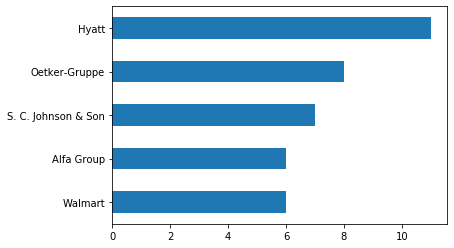

In [165]:
df.company.value_counts().head().plot(kind='barh').invert_yaxis()


## 7) How much money do these billionaires have in total?

In [106]:
# for billionaires in 6)
df[\
   (df.company=='Hyatt') \
   | (df.company=='Oetker-Gruppe') \
   | (df.company=='S.C.Johnson & Son') \
   | (df.company=='Walmart') \
   | (df.company=='Cargill')]\
.networthusbillion\
.sum()

212.79999999999998

In [171]:
# for all billionaires
df.networthusbillion.sum()

6454.400000000001

## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [114]:
df.groupby(by='citizenship').networthusbillion.sum().sort_values(ascending=False).head(10)

citizenship
United States     2322.4
Russia             422.5
Germany            401.4
China              375.8
France             235.3
Hong Kong          213.7
Brazil             192.2
India              191.9
Italy              158.1
United Kingdom     152.0
Name: networthusbillion, dtype: float64

## 9) How old is an average billionaire? How old are self-made billionaires  vs. non self-made billionaires? 

In [116]:
df.age.mean()

63.34213836477988

In [118]:
df.groupby(by='selfmade').age.mean()

selfmade
inherited    64.962185
self-made    62.625899
Name: age, dtype: float64

## 10) Who are the youngest billionaires? Who are the oldest? Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

In [126]:
#youngest billionaires
df.sort_values(by='age').name.head(10)

1172                   Perenna Kei
397               Dustin Moskovitz
1004               Mark Zuckerberg
127            Anton Kathrein, Jr.
394                   Drew Houston
28      Albert von Thurn und Taxis
406                Eduardo Saverin
1340                  Scott Duncan
1607                   Yang Huiyan
991        Marie Besnier Beauvalot
Name: name, dtype: object

In [128]:
#oldest billionaires
df.sort_values(by='age', ascending=False).name.head(10)

343       David Rockefeller, Sr.
816                Karl Wlaschek
836               Kirk Kerkorian
588                Henry Hillman
435           Erika Pohl-Stroher
1428           Sulaiman Al Rajhi
122            Anne Cox Chambers
815                Karl Albrecht
77      Aloysio de Andrade Faria
1560              Wang Yung-Tsai
Name: name, dtype: object

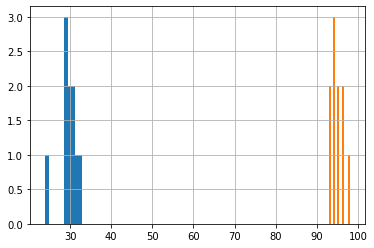

In [130]:
df.age.sort_values().head(10).hist()
df.age.sort_values(ascending=False).head(10).hist()

## 11) Make a scatterplot of net worth compared to age

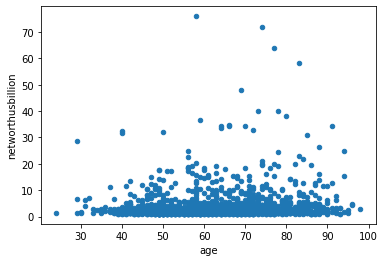

In [133]:
df.plot(x='age', y='networthusbillion', kind='scatter')

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

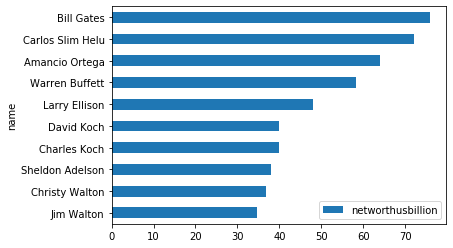

In [146]:
df.sort_values(by='networthusbillion',ascending=False)\
.head(10).plot(x='name', y='networthusbillion',kind='barh')\
.invert_yaxis()